# 2. Perceptron

## 2-1. 논리회로

x*w+b=y

w(weight)는 0.5 

b(bias)는 조정을 하여 AND, NAND, OR을 만든다

### AND gate

In [1]:
# coding: utf-8
import numpy as np


def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


np.sum(w*x)는 w*x 각각한 값을 더한다는 의미.

00 일때 -0.7 으로 0

10 일때 -0.2 으로 0

01 일때 -0.2 으로 0

11 일때 0.3 으로 1

여기서 임계값은 0이다.

### NAND / OR gate

#### NAND는 NOT AND 즉 AND의 반대이다.

In [3]:
# coding: utf-8
import numpy as np


def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


AND gate와 다르게 b(bias)가 양인 점을 확인

#### OR

In [4]:
# coding: utf-8
import numpy as np


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


00 일때 -0.2로 0

10 일때 0.3으로 1

01 일때 0.3으로 1

11 일때 0.8으로 1

여기서 임계값은 0이다

#### XOR

XOR은 OR의 반대가 아니었다.. 난 무얼 배운것인가

같은 것이 없는 걸 1로.

교집합이 없는 집합을 생각


이번에는 직접 구현해보자 ctrl+c ctrl+v

In [14]:
# coding: utf-8
import numpy as np


def XOR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 1
    else:
        return 0

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 0


우선 x*w

00 0
10 0.5
01 0.5
11 1.0


##### 답안

In [16]:
# coding: utf-8
# from and_gate import AND
# from or_gate import OR
# from nand_gate import NAND

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


## 2-3. idea와 한계 그리고 다층 Perceptron

#### 간단한 구현부터

- 기존 식

    w1x1+w2x2<=theta
    

- 이후 식

    w1x1+w2x2+b(-theta)<=0

- 단층 perceptron과 다층 perceptron.

    OR, AND, NAND는 단층 perceptron으로 구현가능 (선형)

    하지만 XOR은 다층 perceptron으로 구현 (곡선형)


# 3. 신경망

## 3-1. Intro    
( 신경망 = perceptron + activation function)

- 3 개층이지만, 가중치가 있는 층만 층으로 인정 (2개층)

    입력층

    은닉층

    출력층 



- 식 변환

    y = w1*x1 + w2*x2 + 1*b

    y= h(w1*x1 + w2*x2 + 1*b)

    h(x) = 0(x<=0),1(x>0)

- 활성화 함수

    a =  w1*x1 + w2*x2 + 1*b

    y = h(a)

## 3-2. 활성화 함수 (activation function)

### 3-2-1. 계단함수

In [21]:
def step_function1(x):
    if x>0:
        return 1
    else:
        return 0
# x에는 실수만 입력된다.

In [18]:
step_function(0.2)

1

1번째 step_function 함수는 실수를 입력 받아야하며, numpy 배열을 입력 받지 못한다.

In [25]:
def step_function2(x):
    y = x > 0
    return y.astype(np.int) 

x 가 np.array([-0.2, 1.0, 1.4]) 라면 

y는 [False,True,True]

return에서는 [0,1,1]이 된다

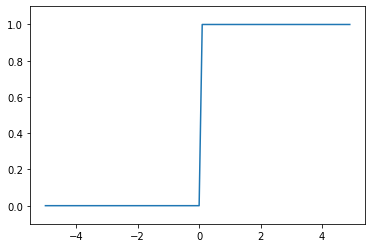

In [40]:
import numpy as np
import matplotlib.pylab as plt

x= np.arange(-5.0,5.0,0.1) # -5.0에서 5.0 까지 0.1간격 # 즉 [ -5.0,-4.9 .... ,4.9,5.0]
y= step_function2(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [41]:
x

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

### 3-2-2. 시그모이드 함수 ( Sigmoid Function)

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [43]:
x = np.array([-1.0,1.0,2.0])

In [44]:
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [45]:
x = np.arange(-5.0, 5.0, 0.1)

In [46]:
y = sigmoid(x)

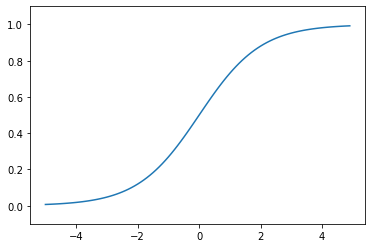

In [47]:
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### 3-2-3. ReLU 함수

In [48]:
def relu(x):
    return np.maximum(0,x) # 둘중 큰값을 반환

In [49]:
x = np.arange(-5.0, 5.0, 0.1)

In [50]:
y = relu(x)

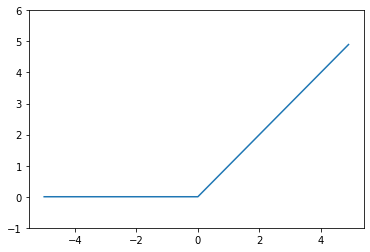

In [58]:
plt.plot(x,y)
plt.ylim(-1,6)
plt.show()

## 3-3. 다차원 배열 계산

### 3-3-1. 행렬곱

#### 2x2 * 2x2

In [59]:
A = np.array([[1,2],[3,4]])

In [60]:
A.shape

(2, 2)

In [61]:
B = np.array([[5,6],[7,8]])

In [62]:
B.shape

(2, 2)

In [63]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

#### 2x3 * 3x2

In [67]:
A = np.array([[1,2,3], [4,5,6]])

In [68]:
A.shape

(2, 3)

In [69]:
B = np.array([[1,2],[3,4],[5,6]])

In [70]:
B.shape

(3, 2)

In [71]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

### 신경망 행렬곱

x = [x1,x2]  
w = [[w1,w2,w3],[w4,w5,w6]]  
y = [y1,y2,y3]

x 2행  
w 2행 3열  

y 3행

In [73]:
X = np.array([1,2])

In [75]:
X.shape

(2,)

In [76]:
W = np.array([[1,3,5],[2,4,6]])

In [77]:
print(W)

[[1 3 5]
 [2 4 6]]


In [78]:
W.shape

(2, 3)

In [79]:
Y = np.dot(X,W)

In [80]:
print(Y)

[ 5 11 17]


In [81]:
Y.shape

(3,)

## 3-4. 3층 신경망 구현

### 0층(입력층) -> 1층

In [15]:
import numpy as np

# 0층(입력층) -> 1층
X= np.array([1.0,0.5])
W1= np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

#1층
A1 = np.dot(X,W1) + B1

(2,)
(2, 3)
(3,)


In [2]:
A1

array([0.3, 0.7, 1.1])

In [5]:
#활성화 함수 sigmoid 적용 
#1층

Z1= sigmoid(A1)

In [6]:
Z1

array([0.57444252, 0.66818777, 0.75026011])

### 1층 -> 2층

In [10]:
# 1층 -> 2층


X2 = Z1 
W2= np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(X2.shape)
print(W2.shape)
print(B2.shape)

#3층
A2 = np.dot(X2,W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [11]:
Z2

array([0.62624937, 0.7710107 ])

### 2층 -> 3층(출력층)

In [12]:
# 2층 -> 3층(츌력층)
# 출력층의 활성함수는 회귀에는 항등함수, 2가지 종류 분류는 sigmoid, 여러 종류 분류는 softmax를 사용
def identify_function(x):
    return x

X3 = Z2
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(X3, W3) +B3
Y = identify_function(A3)

In [13]:
Y

array([0.31682708, 0.69627909])

    "출력층의 활성함수는 회귀에는 항등함수, 2가지 종류 분류는 sigmoid, 여러 종류 분류는 softmax를 사용"

### 정리

In [21]:
# W와 b 정보
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3]) 
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2]) 
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2]) 
    
    return network


def identify_function(x):
    return x

# 신경망 구조 
def forward(network, x):
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1, b2, b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1) +b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) +b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)
    
    return y


network = init_network()
x = np.array([1.0,0.5]) # 입력
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3-5. 출력층 설계   
항등항수와 소프트맥스

### Softmax

#### 정의구현

In [22]:
#소프트 맥스 식을 그대로 나타내보자

#예
a = np.array([0.3, 2.9, 4.0])

# 분자
exp_a = np.exp(a)
print(exp_a)

#분모
sum_exp_a = np.sum(exp_a) 
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [23]:
# 정의
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a) 
    y = exp_a / sum_exp_a
    return y

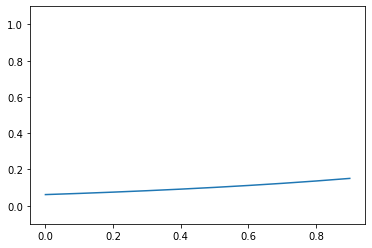

In [45]:
import matplotlib.pylab as plt

x= np.arange(0,1,0.1) # -5.0에서 5.0 까지 0.1간격 # 즉 [ -5.0,-4.9 .... ,4.9,5.0]
y= softmax(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

    "softmax는 overflow 문제가 있다. 그러므로 각 분자와 분모에 입력값의 최댓값을 빼주면 된다."

In [44]:
# 재정의
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a) 
    y = exp_a / sum_exp_a
    return y

#### Softmax 함수 특징

        "0과 1사이의 실수 - > 즉 확률"

In [46]:


a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)

np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

    "활성화 함수인 softmax를 사용하든 사용하기 전이든 가장 최대값은 마찬가지다. 따라서 현업에서는 생략하기도 한다"   


## 3-6. 손글씨 숫자 인식

Local에서 진행하려면 
1. 해당 ipynb 파일을 deep-learning-from-scratch-master 폴더 안에 위치.

2. gz 파일 다운로드 후 deep-learning-from-scratch-master 폴더 안에 위치.

http://yann.lecun.com/exdb/mnist/
에서

    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
을 다운로드.

아래 코드를 실행한다면 deep-learning-from-scratch-master 폴더 안에 mnist.pkl을 만들 수 있다.

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)  
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)


5
(784,)
(28, 28)


In [22]:
# coding: utf-8

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


## 이미지 데이터를 불러와 1~10 중 어느 숫자인지 맞춰본다.
## x에는 이미지의 배열이, t에는 이미지에 대한 답이 있다.
## 각 인덱스에 대응하여 x는 이미지 데이터, t는 라벨 데이터이다.

def get_data(): 
    # x는 입력, t는 검증 데이터이다.
    # 여기서 train은 따로 하지 않으므로 test 데이터셋만 사용.
    # x_test와 t_test는 같은 데이터 같은 인덱스를 가지고 있다.
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    # pkl에는 weight와 bias가 있다.
    with open("./ch03/sample_weight.pkl", 'rb') as f: 
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

# 입력데이터셋과 검증데이터셋을 불러온다
x, t = get_data() 

# weight와 bias를 불러온다
network = init_network()
accuracy_cnt = 0


for i in range(len(x)):
    # y는 각 이미지당 10개 배열로 각1~10 에 대한 가능성이 저장되어있다.
    y = predict(network, x[i]) 
    p= np.argmax(y) # 1~10중 확률이 가장 높은 원소의 인덱스를 얻는다.
#     print(y)
    #만약 해당이미지에 대해 가장 확률이 높이 나온 숫자가 정답이라면 count를 한다
    if p == t[i]:
        accuracy_cnt += 1
    else:
#         print(p)
        print('\n')

# 전체 이미지 중 정답 count를 정확도로 표시
print("Accuracy:" + str(float(accuracy_cnt) / len(x))) 


[8.4412488e-05 2.6350631e-06 7.1549421e-04 1.2586262e-03 1.1727954e-06
 4.4990808e-05 1.6269318e-08 9.9706501e-01 9.3744793e-06 8.1831159e-04]
[4.83633112e-03 1.10458629e-03 9.44252372e-01 1.43091455e-02
 5.69895633e-07 6.67604618e-03 2.75333561e-02 1.27084354e-06
 1.28642377e-03 4.78646243e-08]
[1.0358299e-07 9.8897260e-01 4.2894878e-03 1.7832081e-03 1.3173360e-04
 7.5940735e-04 4.6890968e-04 2.2699733e-03 1.2378697e-03 8.6714674e-05]
[9.9411470e-01 8.2114703e-08 1.5906469e-03 1.8977541e-04 4.3212358e-06
 3.3713970e-03 4.0662949e-04 2.3197019e-04 4.8360227e-05 4.2039257e-05]
[2.0664315e-04 6.5651075e-06 2.8900336e-03 3.3272077e-05 9.5477366e-01
 4.8162011e-04 2.0392602e-03 5.4869489e-03 1.4368899e-03 3.2645263e-02]
[3.0314158e-08 9.8850071e-01 1.7312473e-03 2.2392001e-03 8.4456326e-05
 2.9864057e-04 3.4739434e-05 4.7724475e-03 1.9128988e-03 4.2562996e-04]
[3.8058201e-06 4.5063342e-05 2.0019805e-05 1.4376781e-04 9.7458696e-01
 8.6942585e-03 5.7727908e-04 6.8621512e-04 5.3438493e-03 9.8

 8.0468802e-05 1.4952864e-08 9.9612314e-01 4.3292516e-06 3.5856890e-03]
[7.0038632e-06 9.4671268e-03 3.6328549e-03 1.4082932e-02 2.3214378e-05
 1.4700335e-03 5.5007644e-07 9.2975640e-01 5.7297945e-03 3.5830025e-02]
[3.5060348e-04 1.2089920e-04 1.8491388e-05 4.4599748e-01 1.4829311e-05
 5.3659964e-01 3.7384058e-07 5.4305014e-03 6.6976286e-03 4.7696303e-03]
[1.06953106e-04 1.08808035e-06 2.37431486e-05 5.27745869e-04
 1.43251248e-06 2.41553644e-04 1.29936613e-08 9.96429861e-01
 9.58464989e-06 2.65799882e-03]
[8.7808849e-07 5.1827882e-03 3.3873628e-04 3.5269270e-03 2.6143230e-02
 6.9888949e-04 7.6842771e-05 8.4708221e-03 5.4658111e-03 9.5009506e-01]
[3.7756268e-05 1.9020119e-06 8.5625525e-06 1.3476126e-04 8.8164685e-05
 5.9813663e-04 1.9565569e-07 9.9133599e-01 1.0371732e-05 7.7841356e-03]
[4.0949075e-09 9.9672532e-01 5.4087461e-04 5.2679039e-04 2.1868249e-05
 1.6756186e-04 1.4262908e-04 8.1068276e-05 1.7665575e-03 2.7174758e-05]
[8.5624436e-07 2.7380700e-03 2.5533911e-04 1.6795521e-03 8.

[1.1188594e-08 9.9500531e-01 1.8752636e-04 1.9065678e-03 2.2182327e-05
 6.5332366e-04 3.1071591e-05 8.7775831e-04 1.1308565e-03 1.8534355e-04]
[4.0268174e-06 4.0763076e-05 6.6978845e-04 4.8256328e-04 9.7152901e-01
 5.6903844e-04 9.3132252e-04 5.5590732e-04 3.9310670e-03 2.1286488e-02]
[4.0720836e-03 8.7920089e-06 2.6616191e-05 2.5275717e-02 9.0512876e-05
 9.6445525e-01 1.4509168e-05 4.3899741e-04 2.9301809e-03 2.6875008e-03]
[1.51448678e-02 6.95657742e-04 1.29230805e-02 1.14574935e-02
 4.37505264e-03 3.99441123e-01 5.51970184e-01 6.91703695e-04
 3.13942134e-03 1.61411721e-04]
[8.7887665e-06 3.0735947e-04 9.1055920e-03 1.5714144e-02 6.6031907e-03
 5.1852543e-04 2.1354086e-05 1.8570782e-04 9.2369699e-01 4.3838266e-02]
[8.1191001e-06 2.4021916e-05 3.7051563e-05 3.1247938e-03 7.0273909e-03
 7.6513988e-04 2.9520550e-06 6.6143149e-03 1.3560475e-03 9.8104024e-01]
[4.5400837e-05 4.9275841e-05 2.4403867e-03 1.6768371e-04 8.9602065e-01
 5.6551280e-04 2.1862292e-03 2.5701514e-03 5.0920071e-03 9.0

[9.6387121e-06 4.9507604e-03 9.6326059e-04 2.3174013e-03 1.5334186e-01
 3.3792660e-03 7.2490860e-04 1.5824407e-01 2.1895000e-03 6.7387933e-01]


[9.3392853e-04 1.9681784e-03 4.3776291e-03 9.0475567e-03 8.4680721e-02
 5.7435423e-01 2.2741169e-01 3.3819324e-05 9.6036509e-02 1.1556693e-03]
[1.9068563e-06 1.8548594e-04 7.2606286e-04 4.5426385e-03 5.9704876e-06
 1.2635661e-04 4.7780070e-08 9.8606920e-01 2.4214735e-04 8.1001995e-03]
[1.0077580e-04 4.4931323e-05 9.9218255e-01 6.4551616e-03 2.9265752e-06
 2.9577779e-05 1.1021738e-03 2.7765579e-06 7.9060548e-05 8.5380577e-08]
[8.8399947e-01 4.8012162e-06 1.2262926e-02 3.3017464e-02 6.3728189e-06
 3.4423579e-02 4.5837473e-06 2.5339186e-02 1.9763992e-03 8.9650434e-03]
[3.8507694e-01 1.5443377e-04 3.0075695e-02 2.7241370e-01 1.0308942e-05
 2.6837185e-01 1.2667289e-04 2.4889635e-02 1.7453523e-02 1.4271762e-03]


[2.6639007e-02 6.3723163e-04 6.0337353e-02 1.3841747e-02 1.3557622e-03
 3.4407938e-01 8.0386952e-02 6.9683942e-05 4.7226706e-01 3.8570611e

[4.7385906e-06 2.1655800e-02 8.9939177e-01 7.0045464e-02 1.3246053e-05
 9.0780908e-05 1.2634271e-04 3.2683590e-03 5.3401911e-03 6.3237574e-05]


[2.1472622e-02 2.1812928e-04 5.7153223e-04 5.3786017e-02 4.0958548e-05
 9.1409594e-01 6.6254719e-04 8.3478104e-04 7.8860503e-03 4.3142441e-04]
[8.7471097e-05 9.1886555e-04 1.1014794e-03 1.1062399e-02 1.4131672e-04
 1.8280717e-02 6.2275351e-05 1.9950503e-05 9.6540469e-01 2.9208504e-03]
[9.8396057e-01 1.9916230e-07 2.6914584e-03 8.1373076e-04 1.6822433e-04
 5.8978964e-03 2.6925610e-04 1.9677763e-03 2.5403223e-04 3.9768186e-03]
[4.0075617e-04 7.1142131e-05 5.1053767e-03 1.9604468e-03 3.3601576e-03
 1.0978541e-02 4.2948613e-04 9.5772784e-06 9.7666454e-01 1.0199458e-03]
[1.8954162e-02 2.0774296e-03 2.5358483e-01 2.6124544e-04 3.1673938e-02
 5.5670690e-02 4.2608938e-01 2.2493666e-03 2.0574573e-01 3.6932328e-03]


[5.0765636e-09 9.8970944e-01 1.3922097e-04 1.7418519e-03 1.1924519e-04
 5.6203164e-04 5.8339858e-05 4.0838774e-04 6.6034351e-03 6.5795885e

[6.0256386e-01 3.9997556e-07 2.1061589e-04 1.0348742e-03 8.3298574e-04
 3.4300581e-02 2.8195631e-05 3.0364317e-01 1.5696324e-04 5.7228349e-02]


[2.1879487e-03 3.5289093e-04 6.1626239e-03 3.1058255e-04 1.5329352e-03
 4.1748576e-02 9.4008416e-01 6.3119609e-07 7.6074232e-03 1.2106155e-05]
[6.0397429e-06 1.6004642e-04 1.7961577e-03 9.6504918e-05 9.5942777e-01
 4.0280528e-04 4.5833937e-03 1.5374672e-02 2.8977788e-04 1.7862888e-02]
[5.05309820e-01 1.19567576e-05 5.04044443e-03 1.03543885e-02
 1.98320067e-03 4.66238320e-01 7.14018056e-03 3.03715304e-03
 7.83439260e-04 1.01162383e-04]


[5.4109332e-06 4.3458077e-03 2.1622258e-03 2.5629287e-03 3.5805776e-04
 3.6516006e-03 2.2939299e-04 6.0461502e-06 9.8592418e-01 7.5432548e-04]
[9.8366691e-06 9.8965693e-06 3.3236505e-04 4.0918399e-05 9.7362703e-01
 2.6652901e-04 6.9544429e-04 2.1697718e-03 7.9128746e-04 2.2056947e-02]
[3.3313920e-06 1.2673384e-01 1.2122619e-02 5.0774585e-03 1.5338067e-02
 1.6085865e-02 3.5645757e-02 1.2607308e-04 7.8640622e-01

[1.5784537e-05 2.0982810e-05 4.8136243e-04 2.2804197e-04 9.8577106e-01
 3.7726131e-04 3.0855415e-03 3.3774602e-04 3.3092027e-04 9.3513830e-03]
[1.1336651e-06 1.6342124e-01 8.1185931e-01 1.8598069e-02 6.9356887e-05
 1.8284019e-04 2.3118774e-03 1.9433310e-03 1.5972232e-03 1.5632790e-05]
[3.8783986e-05 8.6548309e-05 1.7800941e-03 9.9757487e-01 2.6130897e-07
 3.3637884e-04 9.0143044e-07 6.9655223e-05 1.0736282e-04 5.0895937e-06]
[9.4724583e-06 1.5960417e-04 1.0407927e-03 9.9717283e-01 1.8604081e-07
 5.9928017e-04 8.0583519e-08 1.4480979e-04 8.1618340e-04 5.6739380e-05]
[2.9631873e-04 2.7652530e-05 9.8676550e-01 1.2156883e-02 7.8981775e-06
 8.4557767e-05 5.4192578e-04 5.3561848e-06 1.1391205e-04 1.7205316e-07]
[1.4326099e-07 9.7203672e-01 9.8947051e-04 1.2045410e-02 7.7580335e-04
 6.7676003e-03 5.8772002e-04 3.7960950e-03 2.4770310e-03 5.2394479e-04]
[8.6901465e-04 1.2514652e-06 2.7883487e-05 3.6855889e-04 2.6139187e-05
 1.9514586e-03 1.5912475e-07 9.9061865e-01 2.3261760e-05 6.1137020e-03]

 5.3178385e-04 5.7011934e-05 7.2498415e-03 5.6456757e-04 3.5317257e-04]
[1.4166774e-03 5.0760242e-05 1.3532740e-05 1.8812286e-02 3.5058872e-03
 9.3665779e-01 3.2035096e-04 3.2844083e-04 8.0419686e-03 3.0852346e-02]
[1.5688363e-05 1.5434040e-02 1.1913821e-02 5.4380786e-01 1.0685661e-04
 9.0635465e-03 8.3475525e-06 6.3035367e-03 3.9348501e-01 1.9861212e-02]
[7.9567747e-07 2.9184842e-02 3.3360003e-03 3.4143007e-01 3.0630905e-05
 8.2893117e-04 2.0559399e-07 5.7814175e-01 1.3481610e-02 3.3565182e-02]
[8.3667118e-08 1.1863004e-02 9.9825311e-06 9.1041550e-03 2.7793426e-02
 3.6874113e-03 1.2790276e-05 8.8377809e-03 1.3968387e-02 9.2472297e-01]
[1.8325653e-06 1.2631010e-03 1.6880702e-03 9.3470770e-04 9.6602863e-01
 7.9720200e-04 1.3277840e-02 5.8452645e-04 1.5223002e-03 1.3901892e-02]
[1.4138468e-04 1.6241655e-05 9.8801404e-01 1.1201892e-02 2.8068765e-05
 2.2581673e-05 5.0677283e-04 2.0274731e-05 4.8237995e-05 5.2935383e-07]
[0.02960635 0.00278001 0.14054081 0.00678856 0.07249717 0.44994316
 0.

 6.64946274e-05 1.62130641e-03]
[4.5856333e-04 1.4805076e-04 2.1165609e-04 9.6514487e-01 1.5788435e-05
 3.0849062e-02 7.6157503e-06 2.4206638e-03 4.0402709e-04 3.3969499e-04]
[9.0905967e-05 5.1158490e-03 1.5918832e-02 9.5469379e-01 8.3422708e-07
 2.2801772e-02 1.0912134e-03 6.5592581e-06 2.8006991e-04 1.8808392e-07]
[1.0691161e-05 3.3550948e-02 9.4201058e-01 1.7215624e-02 4.0285192e-07
 3.5538035e-04 6.0759722e-03 5.4011471e-06 7.7478989e-04 5.7493644e-08]
[1.8409807e-04 1.1061823e-03 6.1522234e-02 3.4089145e-04 2.7947363e-01
 1.0567024e-02 6.4015770e-01 5.4438547e-03 8.3960884e-04 3.6482461e-04]
[6.5426098e-06 7.5443209e-06 1.6161210e-05 3.0817513e-04 2.1816783e-04
 4.5703124e-04 1.8103874e-07 9.6359777e-01 3.2509095e-05 3.5355866e-02]
[6.9449848e-04 3.5643149e-03 2.7650993e-02 5.4005748e-03 2.0088872e-03
 1.4044343e-02 9.4349027e-01 2.5009253e-05 3.0084492e-03 1.1269346e-04]
[8.9805269e-01 5.9479680e-06 1.3390354e-02 1.6105366e-03 1.7954331e-04
 6.9991529e-02 1.2059256e-02 1.9214152e

[5.8744117e-05 7.3881424e-06 1.0254775e-03 2.2173412e-04 8.8742018e-01
 3.6787643e-04 4.9247261e-04 2.4193816e-02 3.7720494e-04 8.5835040e-02]
[6.0818088e-03 2.4134568e-05 1.0231351e-02 1.2831575e-03 7.1202978e-02
 2.2570966e-03 1.3317880e-03 2.7886791e-02 1.8308453e-02 8.6139244e-01]
[9.9585271e-01 2.2083588e-08 3.7471816e-04 6.7086141e-05 5.7003153e-06
 3.4370320e-03 8.4825777e-05 1.2349247e-04 2.7141696e-05 2.7127722e-05]
[4.9781197e-06 1.1688708e-03 9.4164871e-03 1.4450410e-04 2.4426652e-01
 1.2285759e-03 7.4319535e-01 3.2618863e-04 1.6197201e-04 8.6530767e-05]
[5.9286850e-07 3.2419201e-03 1.8493602e-05 1.1325346e-02 4.4747591e-01
 5.7239640e-03 2.6046194e-04 1.7700329e-02 1.1449637e-03 5.1310802e-01]


[1.9454343e-02 2.1157150e-04 1.4894801e-02 2.8977625e-02 1.6171238e-01
 3.9914581e-01 1.1356834e-01 9.8319390e-05 2.6032066e-01 1.6161805e-03]


[2.0235741e-06 8.7808854e-05 2.8710227e-04 2.0064677e-04 9.6163195e-01
 1.1279382e-03 2.1947661e-04 4.1493536e-03 5.4891058e-03 2.6804600e

[4.3227723e-05 4.2674626e-05 2.0760321e-03 1.5077788e-04 4.7562391e-02
 2.1484247e-04 6.5067936e-05 1.3331492e-02 1.4879399e-02 9.2163402e-01]
[5.1455547e-05 4.9073459e-03 9.6233636e-01 5.1235864e-03 2.0027871e-04
 4.2733416e-04 2.6316551e-02 1.5564273e-04 4.7789310e-04 3.5204118e-06]
[1.1326100e-05 1.4428182e-04 4.3090540e-03 5.9111498e-04 2.3372196e-04
 1.2594695e-03 4.0173280e-05 6.2654040e-06 9.9304843e-01 3.5614322e-04]
[1.8313382e-05 4.4244021e-04 8.3719572e-04 4.4066741e-04 1.7304642e-02
 1.7455174e-02 2.3370537e-03 9.8602213e-06 9.5927274e-01 1.8818957e-03]
[2.7748477e-08 9.8425668e-01 2.2270000e-03 4.0756385e-03 1.0449934e-04
 2.8113028e-04 3.5183719e-05 4.7940938e-03 3.6069762e-03 6.1886688e-04]
[1.5543435e-04 7.8955263e-06 9.4638597e-03 6.0649959e-06 3.0529180e-01
 2.6022558e-04 6.8452358e-01 1.4478309e-04 5.4585904e-05 9.1806716e-05]
[7.6397825e-03 1.2313192e-04 4.5594761e-01 2.2685903e-01 3.3921332e-03
 3.4169974e-03 3.5089481e-04 1.0492266e-03 2.5305420e-01 4.8166875e-02]

 9.1038522e-04 4.0015580e-06 9.8158536e-04 1.2841135e-02 9.5444101e-01]
[1.1310086e-06 3.1874226e-03 2.1473366e-05 5.1120962e-03 4.2609163e-02
 7.6938183e-03 3.7148711e-05 9.8327389e-03 4.4395686e-03 9.2706543e-01]
[2.7113329e-04 1.6883612e-05 6.8834610e-03 9.0584599e-06 1.3388692e-03
 2.8231394e-04 9.9107003e-01 3.9356501e-06 1.1797115e-04 6.3960551e-06]
[2.6152479e-03 4.9990426e-06 1.5453628e-03 8.0547579e-06 8.7258524e-01
 1.0519345e-02 9.8937348e-02 1.5481854e-04 8.8203531e-03 4.8090415e-03]
[3.4510461e-04 6.9573134e-06 9.9555534e-01 3.0427217e-03 2.3314997e-06
 2.0348030e-05 2.4515801e-05 8.6400854e-05 9.1159507e-04 4.7935628e-06]
[3.5140390e-04 7.7797431e-06 4.6398058e-03 1.3602142e-04 1.7090589e-01
 3.5904706e-04 3.7565888e-04 5.1002786e-03 1.2173049e-02 8.0595106e-01]
[1.8175202e-04 1.0257445e-05 2.9437416e-04 1.9377484e-03 7.3791438e-05
 9.4384787e-04 4.3851597e-07 9.7192132e-01 5.8630809e-05 2.4577850e-02]
[1.38739625e-03 3.66021195e-05 9.95415807e-01 9.46983695e-04
 3.654498

 1.0817146e-03 1.9453120e-04 7.8693527e-04 5.8513595e-04 1.0835163e-02]
[1.63035537e-07 9.89163041e-01 4.48514149e-03 2.93973973e-03
 1.32099985e-05 6.62782579e-04 1.56597962e-04 9.41455248e-04
 1.57493970e-03 6.29645510e-05]
[3.5109046e-05 7.3308416e-05 1.0403515e-03 2.9232816e-04 3.2918459e-01
 4.4717890e-04 3.7043946e-04 5.9963789e-02 1.3661864e-03 6.0722673e-01]
[4.0092499e-07 7.7256140e-05 7.0384158e-06 7.8360393e-04 2.1409960e-02
 2.2314636e-04 6.0753796e-06 7.7080482e-04 2.7604015e-03 9.7396129e-01]
[1.1235524e-04 6.6172965e-06 9.9909878e-01 4.0156976e-04 2.0627485e-06
 8.3457553e-06 1.2379911e-04 5.0293465e-06 2.4110780e-04 3.1636685e-07]
[7.5089933e-06 3.5600197e-03 5.5844137e-03 5.9136790e-03 8.1254671e-05
 3.5076856e-04 1.3744516e-06 9.4534534e-01 7.7613065e-04 3.8379475e-02]
[1.2576910e-05 1.5939947e-02 2.4709625e-02 1.0682521e-02 1.5289270e-02
 2.0792028e-02 6.5520303e-03 1.1485105e-03 9.0325892e-01 1.6145717e-03]
[8.6724806e-01 5.3734146e-07 5.5599544e-04 3.5544941e-05 4.

[1.6720998e-05 4.2497131e-06 1.1615881e-05 6.9844240e-04 6.5479227e-03
 7.2139513e-04 3.6998140e-06 1.0793434e-02 7.2111486e-04 9.8048145e-01]
[4.8765873e-08 9.9273843e-01 3.1212408e-03 1.2071824e-03 2.2336410e-05
 2.2777576e-04 8.2895305e-05 6.1894971e-04 1.9083838e-03 7.2835181e-05]
[4.9748819e-04 1.4242805e-06 8.7917468e-04 3.7520484e-03 1.2019212e-06
 8.0855723e-05 3.6965751e-08 9.9298441e-01 8.7012768e-06 1.7946744e-03]
[3.25219780e-08 9.93072212e-01 2.04155827e-03 7.04744132e-04
 5.79285297e-05 3.27930931e-04 4.56634152e-04 1.12096764e-04
 3.18422122e-03 4.25936996e-05]
[1.0216866e-05 1.0683393e-06 1.4212751e-04 5.3163848e-07 9.9492574e-01
 7.7511271e-05 1.4534147e-03 8.8821742e-04 9.0301524e-05 2.4108679e-03]
[9.8588008e-01 1.5874888e-07 6.3771312e-04 4.1050176e-04 3.3156625e-06
 1.1931317e-02 3.6849870e-05 6.9641319e-05 9.0538053e-04 1.2506756e-04]
[9.9619979e-01 1.1703716e-08 1.8275902e-04 2.9224462e-05 1.7984050e-06
 3.4019151e-03 2.1638141e-05 4.8720049e-05 6.6816530e-05 4.7

 7.0438073e-03 6.7224115e-05 1.0841892e-05 4.0459927e-04 1.4088131e-05]
[2.0985291e-03 1.7858509e-04 2.1084355e-02 9.5256293e-01 8.0013233e-06
 4.5454092e-03 2.0908950e-05 1.3368595e-03 1.7128823e-02 1.0356344e-03]
[2.6580811e-04 2.9670518e-06 8.0276050e-06 8.3919248e-04 1.7796931e-03
 4.1171839e-03 1.0993556e-06 6.2631285e-01 2.8475537e-05 3.6664471e-01]
[3.1109704e-09 9.9468130e-01 1.7623387e-04 1.4193679e-03 3.8436618e-05
 3.1694819e-04 2.5162602e-05 4.0988208e-04 2.7083154e-03 2.2443957e-04]
[8.9929235e-06 2.0386332e-04 1.0268186e-02 5.0630108e-05 2.0172532e-01
 4.2050102e-04 7.8696072e-01 1.9222769e-04 1.0664396e-04 6.2965017e-05]
[1.6313008e-06 1.6584073e-01 1.9282103e-03 1.2319809e-02 7.2056907e-01
 1.3696504e-02 4.8746809e-02 8.6592063e-03 2.2064019e-03 2.6031597e-02]
[1.7903784e-04 1.8917452e-04 9.9295831e-01 4.9560750e-03 2.9221604e-07
 1.1633938e-04 8.7889587e-04 4.5761638e-07 7.2145712e-04 4.2192568e-08]
[6.3833827e-06 7.6573313e-04 1.2724393e-02 7.1444723e-05 6.7137941e-03

 2.1508297e-04 1.0979366e-07 9.9390453e-01 1.7099612e-05 2.9245913e-03]
[4.6194553e-05 1.7990991e-04 9.9280024e-01 2.9140917e-04 2.3304920e-05
 7.8232704e-05 2.3060050e-03 5.3816417e-05 4.2164940e-03 4.5454717e-06]
[4.0237533e-06 1.0098669e-03 9.9281478e-01 3.1480775e-03 1.0865979e-05
 3.5250388e-05 2.7305558e-03 4.8331272e-05 1.9790816e-04 3.4128755e-07]
[8.17498832e-04 1.80243471e-04 4.64096556e-05 1.27768323e-01
 2.90517404e-04 6.86790287e-01 3.67456505e-06 8.76194239e-03
 6.07161708e-02 1.14624955e-01]
[3.6042763e-06 1.6458596e-04 9.2549679e-05 5.1709097e-03 3.6648660e-05
 9.2011306e-04 1.1469877e-07 9.5942110e-01 3.6953238e-04 3.3820964e-02]
[2.2245646e-07 1.0165049e-04 7.4833270e-06 1.6062291e-03 1.0399450e-02
 3.9024965e-04 1.7087175e-06 2.1059820e-03 3.1203125e-03 9.8226672e-01]
[8.9736546e-05 3.5920163e-04 1.4291612e-03 9.2993036e-02 1.8537506e-03
 1.5534547e-02 9.5996198e-05 5.4316894e-05 8.6483359e-01 2.2756696e-02]
[2.1555433e-04 6.7614768e-05 9.5310754e-01 3.7176687e-05 3.

[2.3844510e-05 1.4051909e-06 5.6261186e-05 4.4621393e-05 4.5629188e-02
 6.6670254e-05 8.6600903e-06 9.8345634e-03 4.3284477e-04 9.4390202e-01]
[9.8657346e-01 7.5205605e-08 1.2329656e-03 1.3263254e-04 1.8099550e-05
 1.0378429e-02 1.5881828e-03 2.4251121e-05 4.3726141e-05 8.1837434e-06]
[2.2366924e-06 9.3388200e-01 3.7306663e-02 3.2110752e-03 3.9620958e-05
 1.9947423e-03 9.7992981e-04 2.5907243e-04 2.2263190e-02 6.1614723e-05]
[2.2909794e-02 2.5301822e-04 8.4742177e-01 3.4394779e-04 2.9351984e-05
 1.3243340e-02 6.6842064e-03 1.5533569e-04 1.0892869e-01 3.0544765e-05]
[1.38241841e-04 5.73272227e-05 3.94430943e-04 9.95542109e-01
 5.84692714e-07 3.34371603e-03 1.06352218e-06 3.34016368e-05
 4.75071982e-04 1.40557695e-05]
[3.1718344e-05 3.4850823e-06 3.3405938e-04 1.0837095e-05 9.9252510e-01
 3.2960903e-04 3.0405780e-03 4.6757958e-04 4.0103760e-04 2.8559135e-03]
[2.1283142e-04 2.1707260e-06 2.6035685e-05 2.6792468e-04 9.5965770e-05
 1.2120543e-03 1.1698328e-07 9.7816646e-01 2.7755816e-05 1.9

 7.1347305e-03 2.1092687e-02 4.5752092e-03 1.2486223e-02 6.5164700e-02]
[9.9756879e-01 6.3590990e-09 2.2884410e-04 3.5885081e-05 7.1640955e-07
 2.0274823e-03 1.2042320e-04 9.5855257e-06 6.3957586e-06 1.8565721e-06]
[9.0864822e-03 1.2952219e-05 9.4221048e-03 3.5097652e-05 2.2246316e-03
 6.4172614e-03 9.7233599e-01 2.4599733e-06 4.5616928e-04 6.9794055e-06]
[8.75843980e-05 3.63909632e-01 1.24366485e-01 5.30700898e-03
 5.27110067e-04 2.54764725e-02 4.41140175e-01 2.74233207e-05
 3.91337536e-02 2.44385592e-05]


[1.9737193e-03 8.6739437e-06 1.7515634e-03 1.9722713e-05 4.6879166e-01
 2.9697679e-03 4.8418380e-03 3.1680544e-03 1.8795485e-02 4.9767944e-01]
[1.16950614e-04 2.27369223e-04 1.89405354e-03 1.42336748e-05
 2.34468862e-01 8.99788272e-03 7.53139555e-01 5.56558152e-05
 9.21139668e-04 1.64235404e-04]


[9.9819130e-01 8.2184171e-09 4.4868790e-04 8.9315210e-05 3.0606594e-07
 1.2095890e-03 3.0676056e-05 2.0321710e-05 7.3500114e-06 2.4907142e-06]
[3.3857621e-06 5.2580680e-03 1.7604647e-04 6

 2.2932852e-03 4.0331244e-08 9.8468117e-05 7.7869254e-04 3.8839647e-05]
[0.07415958 0.00157026 0.0199644  0.11374141 0.10760054 0.15764616
 0.36020568 0.15818684 0.00065103 0.00627407]


[2.3800644e-07 9.7225666e-01 9.5858080e-03 5.6868880e-03 1.1566838e-04
 7.7141047e-04 5.3175365e-05 7.2864708e-03 3.8895272e-03 3.5422601e-04]
[1.8586039e-06 2.4814271e-06 6.0421203e-06 4.5575143e-06 9.9558711e-01
 3.4617953e-04 4.7740526e-04 5.1601854e-04 3.6958791e-05 3.0214812e-03]
[1.0563210e-03 5.9566162e-07 1.1840087e-05 1.4608396e-04 2.7487104e-05
 1.3379878e-03 1.0274168e-07 9.8891467e-01 5.6891113e-06 8.4992964e-03]
[2.9924644e-05 1.8419967e-03 1.2213127e-02 8.5208291e-01 9.0535177e-06
 4.5274888e-04 2.6270123e-07 2.4587493e-03 1.0439460e-01 2.6516521e-02]


[9.93212104e-01 8.61154881e-09 7.28249943e-05 1.02365186e-04
 4.15806227e-07 6.47153333e-03 3.91400090e-06 1.04233448e-04
 9.76961292e-06 2.26948905e-05]
[3.7613604e-06 5.7799407e-05 3.0694791e-04 9.9864525e-01 6.4412592e-07
 1.8018710e-04

 6.1604794e-04 2.0133562e-06 1.7273935e-02 2.9526621e-03 9.6257687e-01]
[9.9439430e-01 3.2459482e-08 4.0815322e-04 2.2858211e-04 1.5381764e-06
 4.7027729e-03 1.3285421e-05 4.2572461e-05 1.5771466e-04 5.1151161e-05]
[9.9466789e-01 3.3945053e-08 5.4798473e-04 1.2547616e-04 2.0527607e-06
 4.3133609e-03 2.6517693e-04 8.8510742e-06 6.3808497e-05 5.4012785e-06]
[2.5234465e-06 1.6720533e-04 1.8401857e-05 2.0753508e-04 6.2159513e-04
 5.7479524e-04 5.1014291e-07 9.7255456e-01 6.8978188e-05 2.5783932e-02]
[8.7133335e-04 5.3700851e-03 1.8403354e-01 5.1053844e-02 9.1344125e-05
 2.0865873e-02 3.2802275e-04 1.4565205e-03 7.3443776e-01 1.4916233e-03]


[5.4469000e-04 5.4005159e-06 4.3134289e-03 2.0647783e-06 2.2287066e-03
 2.9441086e-04 9.9256891e-01 2.9743644e-06 3.2880180e-05 6.5656022e-06]
[0.00565789 0.00169376 0.01230484 0.01485203 0.27776083 0.57223374
 0.03224239 0.00436446 0.0719719  0.00691817]
[0.00246923 0.01757232 0.05410723 0.00702063 0.12540467 0.50165504
 0.07231027 0.00303955 0.212541

[0.00928607 0.00405272 0.05459507 0.00101434 0.06454113 0.16212747
 0.4399444  0.00056107 0.26204857 0.00182916]


[3.4025541e-04 9.1474849e-06 1.4580674e-03 6.0236409e-05 3.7326521e-05
 1.7992473e-03 3.5001976e-05 4.7018561e-06 9.9576902e-01 4.8704789e-04]
[4.2350701e-05 4.6911457e-01 1.4324111e-01 2.5368528e-02 5.8632129e-04
 1.0061729e-02 2.4633266e-03 2.4475961e-04 3.4819841e-01 6.7889842e-04]
[4.01454163e-05 3.34351480e-01 1.13390505e-01 8.90475977e-03
 3.96939628e-02 9.37651936e-03 3.74664932e-01 2.43362156e-03
 1.12729944e-01 4.41400846e-03]


[1.4475574e-03 8.6150176e-05 9.7331929e-01 1.0927950e-02 3.3600545e-03
 8.6785541e-05 2.3190742e-03 1.2906472e-03 2.0167048e-03 5.1458273e-03]
[6.7420804e-04 2.7806680e-05 4.9234568e-03 2.4864293e-04 3.4587763e-05
 2.0584150e-03 8.7962580e-05 1.0643467e-05 9.9110121e-01 8.3306362e-04]
[1.0260862e-05 1.1404128e-05 4.1253901e-05 8.7381333e-05 1.0937781e-04
 2.6673818e-04 1.0420776e-07 9.8119360e-01 2.2544358e-04 1.8054331e-02]
[1.1888115e-03

 1.9138476e-03 4.5178542e-05 3.2415550e-04 1.6922522e-02 5.1403087e-05]
[4.3432705e-02 4.6121581e-06 1.3640877e-02 7.0172496e-02 2.5120053e-06
 1.8151618e-03 1.0702557e-06 8.6898988e-01 4.8188434e-05 1.8925680e-03]
[1.4032722e-07 9.7109139e-01 1.1388951e-02 1.4773895e-03 6.2189625e-05
 1.1420368e-03 1.9041533e-04 1.5638077e-04 1.4473586e-02 1.7500968e-05]
[3.0672936e-07 9.7200567e-01 1.8645940e-02 9.3471468e-04 8.8231929e-05
 1.0197324e-03 7.0157141e-04 4.8307545e-04 6.1000190e-03 2.0772704e-05]
[9.9258935e-01 3.6390528e-08 6.5768551e-04 1.6224658e-04 1.9452912e-07
 6.4484235e-03 1.1696106e-04 6.7851020e-06 1.7238879e-05 1.0965763e-06]
[1.4880701e-04 1.1514861e-03 6.9137306e-05 4.9320576e-01 6.7220884e-05
 3.7740582e-01 2.1971225e-06 6.6128536e-03 8.5514538e-02 3.5822161e-02]
[3.8070445e-06 1.9826790e-05 2.6454243e-05 1.0445603e-05 9.7936606e-01
 1.0632585e-03 1.4787752e-03 1.8697276e-04 1.6396249e-03 1.6204849e-02]
[1.3464435e-03 1.2318641e-02 7.9968810e-01 6.4296825e-03 1.8429301e-04

[2.40154308e-03 7.72493659e-05 3.50193935e-03 9.80989039e-01
 1.61800199e-06 1.11422725e-02 3.12424027e-06 6.12409262e-04
 1.22610177e-03 4.45444784e-05]
[4.6851225e-03 1.2151877e-04 1.2621308e-04 2.3425076e-02 3.2583688e-04
 9.5151603e-01 2.1958906e-04 1.3161165e-03 1.5636271e-02 2.6281269e-03]
[9.87247825e-01 1.51419606e-08 1.53843881e-04 5.30129073e-05
 1.03902124e-07 1.24573577e-02 3.11391159e-06 2.06913101e-05
 5.48737225e-05 9.13377426e-06]
[2.7520391e-08 9.9382210e-01 1.7186655e-03 1.1889989e-03 2.0302883e-05
 3.4347601e-04 1.9119662e-04 2.1164364e-04 2.4666300e-03 3.6987116e-05]
[1.8586828e-09 9.9670535e-01 4.3236723e-04 1.0868784e-03 2.1489130e-05
 8.6304964e-05 3.0399153e-05 1.9444097e-04 1.3798644e-03 6.2988212e-05]
[1.7303400e-05 8.3871797e-05 2.2059963e-04 9.9529016e-01 9.6117026e-07
 1.7488695e-03 2.1405935e-08 4.7817358e-04 1.5344459e-03 6.2563876e-04]
[7.2393712e-05 4.2771109e-04 7.0350519e-03 4.8985016e-03 1.5990142e-03
 1.2724318e-02 7.0911141e-05 3.4692787e-04 9.6859

[4.1231591e-08 9.6772921e-01 1.4251719e-03 6.1255908e-03 4.6792531e-05
 7.6770416e-04 6.4434171e-05 4.7086232e-04 2.2939432e-02 4.3071937e-04]
[1.4407471e-05 9.3165506e-03 9.2396337e-01 6.2233131e-02 3.2663769e-07
 1.6730925e-04 2.0813475e-04 1.0939020e-05 4.0853419e-03 4.1732878e-07]
[1.3549106e-06 1.4741709e-04 6.8574701e-04 9.9884379e-01 2.5793406e-07
 2.4420233e-04 2.8281290e-06 1.8515600e-06 7.2179937e-05 5.0262048e-07]
[9.7420670e-06 1.2074811e-05 3.3286234e-04 1.0867398e-05 9.5456302e-01
 1.0611085e-04 2.3501099e-03 2.4329252e-03 2.4928001e-04 3.9933052e-02]
[8.0129817e-02 1.2720839e-05 5.0377054e-04 1.3975201e-02 3.0131470e-03
 8.2366967e-01 6.4857292e-04 5.5917038e-04 4.7926273e-02 2.9561697e-02]
[1.16706207e-04 2.60395677e-06 8.42451176e-04 1.80741722e-06
 2.63386028e-04 2.55428371e-04 9.98509705e-01 1.03801476e-07
 7.48144112e-06 1.87690446e-07]
[3.7655886e-06 1.3323594e-06 2.3729968e-05 3.2224029e-04 1.7780369e-05
 1.3232113e-05 1.4170061e-08 9.9321151e-01 5.9192512e-06 6.4

 1.0780842e-03 9.6602136e-01 3.5828794e-05 2.6430060e-05 2.1123489e-05]
[3.6696922e-02 1.4278664e-06 8.0963345e-03 2.7744385e-05 2.0001099e-02
 3.3235021e-03 9.3152344e-01 1.4369466e-04 9.1312366e-05 9.4666473e-05]
[2.7348181e-02 6.9586458e-05 2.7195449e-04 8.9421541e-05 7.1988720e-03
 9.4658536e-01 3.3814088e-03 1.9508060e-03 1.2597820e-02 5.0669647e-04]
[8.8605005e-04 1.6867371e-06 4.3382330e-05 9.6075685e-04 1.1127557e-03
 3.6156443e-03 9.3097628e-07 6.2687677e-01 1.0803676e-04 3.6639401e-01]
[1.3277711e-02 1.2534966e-04 8.8693088e-01 8.7993808e-02 3.3452344e-04
 3.4578778e-03 7.5787102e-04 2.0748166e-04 6.8403068e-03 7.4185955e-05]
[2.2201339e-06 7.2380627e-04 4.5768629e-05 8.8927871e-01 9.7311131e-05
 3.3257387e-03 7.8189785e-08 3.4794989e-03 7.7949762e-03 9.5251806e-02]
[3.1870153e-05 3.0212939e-06 1.4587816e-04 3.9001807e-06 9.5907402e-01
 5.8474852e-04 6.4818142e-04 1.0309708e-03 3.3900728e-03 3.5087220e-02]
[6.8789666e-07 1.7258642e-02 1.0949764e-04 1.7463991e-03 2.9404417e-01

[2.4735417e-08 9.8998183e-01 3.4092115e-03 1.3513623e-03 1.5930549e-04
 2.3841829e-04 4.9974904e-05 1.6443835e-03 3.0303104e-03 1.3519695e-04]
[1.5350051e-03 7.4561955e-03 8.1078964e-04 8.4774345e-03 1.9242150e-06
 9.5574880e-01 2.4282142e-05 7.4435241e-04 2.5139241e-02 6.1952065e-05]
[3.85165251e-08 9.92035687e-01 2.41057063e-03 1.50734035e-03
 1.08149114e-04 4.71037376e-04 7.42845878e-05 1.61676004e-03
 1.68859842e-03 8.75398182e-05]
[0.18708827 0.00115536 0.3346676  0.0081473  0.00371086 0.15750925
 0.13307118 0.0009805  0.17019768 0.00347199]


[1.9011654e-04 1.3984400e-02 8.2062632e-01 1.4684563e-02 3.9733272e-06
 1.9800947e-03 7.2432234e-04 4.2892258e-05 1.4775091e-01 1.2329865e-05]
[4.2478992e-03 1.8113084e-03 1.3287876e-03 6.2536764e-01 5.4041833e-05
 3.5006991e-01 1.1488178e-03 1.6856205e-04 1.5430555e-02 3.7245327e-04]
[2.1357603e-04 7.3217397e-04 6.2113584e-05 8.3322406e-01 2.7957938e-05
 1.3708933e-01 4.0995160e-06 1.3371597e-03 1.2172853e-02 1.5136782e-02]
[7.5637217e-04 1

In [15]:
np.ndim(x)

2

In [16]:
x.shape
# 이미지 크기가 28x28= 784 이므로
입력층 뉴런 수는 784개 이다.

(10000, 784)

In [11]:
t

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [18]:
# 1번 은닉층은 뉴런 50개
network['W1'].shape

(784, 50)

In [20]:
# 2번 은닉층은 뉴런 100개
network['W2'].shape

(50, 100)

In [21]:
# 3번 은닉층은 뉴런 10개
network['W3'].shape

(100, 10)

### 배치처리(batch processing)

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 이미지10000장을 100장씩 #배치 크기
accuracy_cnt = 0

print(len(x))
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    # 1행에 1이미지(28x28=784) 100장
    print(x_batch.shape)
#     (100, 784)
    y_batch = predict(network, x_batch)
    # 1행에 1이미지, 1~10까지 각 확률
#     print(y_batch)
#     (100, 10)

    # axis 1, 행기준(각 이미지)기준으로 가장 가능성이 큰 인덱스 p 즉 숫자
    p = np.argmax(y_batch, axis=1)
    print(p)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    print(p == t[i:i+batch_size])
    # 검정표와 같은 이미지는 true 다른이미지는 false, true만 카운트

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


10000
(100, 784)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 2 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 4 3 1 4 1 7 6 9]
[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True]
(100, 784)
[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 4 9 0 5 8 5 6 6 5 7 8 1 0
 1 6 4 6 7 3 1 7 1 8 2 0 9 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3
 2 7 1 8

# 4. 신경망 학습

신경망에서는 매끄러운 sigmoid 함수, 퍼셉트론에서는 갑자기 변하는 계단함수. 왜그럴까?
sofmax는 확률로 바꾸기 위해.

## 4-1. 손실함수

### 4-1-1. 평균제곱오차

In [13]:
def mean_squard_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [9]:
t = [0,0,1,0,0,0,0,0,0,0]

In [17]:
len(t)

10

In [10]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [26]:
len(y)

10

In [24]:
y_not = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [20]:
mean_squard_error(np.array(y),np.array(t))

0.09750000000000003

In [27]:
mean_squard_error(np.array(y_not),np.array(t)) # 오차가 크다

0.5975

### 4-1-2. 교차엔트로피 오차

In [39]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [47]:
y_ex = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [22]:
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [36]:
y_not = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [30]:
cross_entropy_error(np.array(y_not),np.array(t)) # 오차가 크다

2.302584092994546

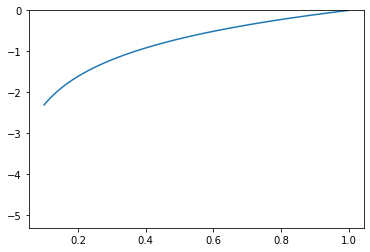

In [60]:
import matplotlib.pylab as plt

x= np.arange(0.1,1.0,0.0001) # -5.0에서 5.0 까지 0.1간격 # 즉 [ -5.0,-4.9 .... ,4.9,5.0]
y= np.log(x)
plt.plot(x,y)
plt.ylim(-5.3,0.0)
plt.show()

 ### 4-1-3. 미니배치 학습

In [4]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test,t_test) = load_mnist(normalize=True, one_hot_label= True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [5]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [6]:
batch_mask

array([23145, 46321,  4445, 56778,  7182, 17138, 20855, 22098, 18007,
       28766])

In [7]:
# 엔트로피 오차 구현
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7)) / batch_size
#     delta = 1e-7
#     return -np.sum(t*np.log(y+delta))

In [34]:
# 엔트로피 오차 구현
# lable이 on_hot_label이 아니라 숫자 lable로 주어졌을때
def cross_entropy_error(y,t):
    if y.ndim == 1: #1차원이라면
        print('y:',y,', y_shape:',y.shape)
        print('before_t:',t)
        t = t.reshape(1, t.size)
        print('after_t:',t)
        print('before_y:',y)
        y = y.reshape(1, y.size)
        print('after_y:',y)
        
    batch_size = y.shape[0]
    print(y.shape)
    return -np.sum(np.log(y[np.arange(batch_size), t]+1e-7)) / batch_size
#     delta = 1e-7
#     return -np.sum(t*np.log(y+delta))

In [35]:
cross_entropy_error(np.array(y),np.array(t))

y: [0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ] , y_shape: (10,)
before_t: [0 0 1 0 0 0 0 0 0 0]
after_t: [[0 0 1 0 0 0 0 0 0 0]]
before_y: [0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]
after_y: [[0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]]
(1, 10)


23.718987110506905

 ## 4-2. 수치 미분

In [61]:
# 나쁜 구현 # 나쁜미분 문송..
# 0.00000000000000000000000000000000000000000000000000000000000000000000001 반올림 오차가 생긴다
def numerical_diff(f,x):
    h  = 10e-50
    return (f(x+h) - f(x)) / h

In [64]:
np.float32(1e-50)

0.0

In [18]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [1]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

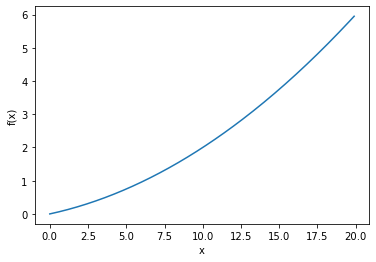

In [2]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [12]:
def function_2(x):
    return x**2

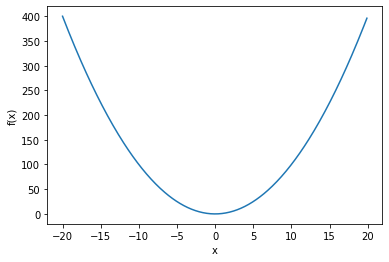

In [13]:
x = np.arange(-20.0, 20.0, 0.1)
y = function_2(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

 ## 4-3. 편미분

In [23]:
def function_2(x):
    return x[0]**2 + x[1]**2
#   return np.sum(x**2)

In [16]:

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0


In [19]:
# x0 = 3, x1 = 4 일때, 편미분 x0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [20]:

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1


In [21]:
# x0 = 3, x1 = 4 일때, 편미분 x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

 ## 4-4. 기울기

In [1]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val  = x[idx]
        
        # f(x+h)
        x[idx] = tmp_val +h
        fxh1 = f(x)
   
        # f(x-h)
        x[idx] = tmp_val -h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val

    return grad
        

In [26]:
numerical_gradient(function_2, np.array([3.0, 4.0]))


array([6., 0.])

In [27]:
numerical_gradient(function_2, np.array([0.0, 2.0]))


array([0., 4.])

In [28]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [2]:
def gradient_descent(f,init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad  = numerical_gradient(f,x)
        x-= lr * grad
    return x

In [3]:
# 문제 경사법으로 f(x0,x1) = x0^2 + x1^2의 최솟값을 구하라.
def function_2(x):
    return x[0]**2 + x[1]**2



In [5]:
import numpy as np
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [6]:
# 학습률이 너무 큰 예 : lr = 10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [7]:
# 학습률이 너무 큰 예 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

In [8]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)


[[ 0.24967591  0.28281579 -0.5324917 ]
 [ 0.37451387  0.42422369 -0.79873755]]
